In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading all csv files

import pandas as pd

feb_cal = pd.read_csv("/content/drive/MyDrive/data/2019/febrouary/calendar.csv")
feb_list = pd.read_csv("/content/drive/MyDrive/data/2019/febrouary/listings.csv", low_memory = False)
feb_list0 = pd.read_csv("/content/drive/MyDrive/data/2019/febrouary/listings0.csv")
feb_neigh =pd.read_csv("/content/drive/MyDrive/data/2019/febrouary/neighbourhoods.csv")
feb_rev =pd.read_csv("/content/drive/MyDrive/data/2019/febrouary/reviews.csv")
feb_rev0 =pd.read_csv("/content/drive/MyDrive/data/2019/febrouary/reviews0.csv")

apr_cal = pd.read_csv("/content/drive/MyDrive/data/2019/april/calendar.csv")
apr_list = pd.read_csv("/content/drive/MyDrive/data/2019/april/listings.csv", low_memory = False)
apr_list0 = pd.read_csv("/content/drive/MyDrive/data/2019/april/listings0.csv")
apr_neigh = pd.read_csv("/content/drive/MyDrive/data/2019/april/neighbourhoods.csv")
apr_rev = pd.read_csv("/content/drive/MyDrive/data/2019/april/reviews.csv")
apr_rev0 = pd.read_csv("/content/drive/MyDrive/data/2019/april/reviews0.csv")

mar_cal = pd.read_csv("/content/drive/MyDrive/data/2019/march/calendar.csv")
mar_list = pd.read_csv("/content/drive/MyDrive/data/2019/march/listings.csv", low_memory = False)
mar_list0 = pd.read_csv("/content/drive/MyDrive/data/2019/march/listings0.csv")
mar_neigh = pd.read_csv("/content/drive/MyDrive/data/2019/march/neighbourhoods.csv")
mar_rev = pd.read_csv("/content/drive/MyDrive/data/2019/march/reviews.csv")
mar_rev0 = pd.read_csv("/content/drive/MyDrive/data/2019/march/reviews0.csv")


mar_cal23 = pd.read_csv("/content/drive/MyDrive/data/2023/march/calendar.csv")
mar_list23 = pd.read_csv("/content/drive/MyDrive/data/2023/march/listings.csv", low_memory = False)
mar_list023 = pd.read_csv("/content/drive/MyDrive/data/2023/march/listings0.csv")
mar_neigh23 = pd.read_csv("/content/drive/MyDrive/data/2023/march/neighbourhoods.csv")
mar_rev23 = pd.read_csv("/content/drive/MyDrive/data/2023/march/reviews.csv")
mar_rev023 = pd.read_csv("/content/drive/MyDrive/data/2023/march/reviews0.csv")

june_cal23 = pd.read_csv("/content/drive/MyDrive/data/2023/june/calendar.csv")
june_list23 = pd.read_csv("/content/drive/MyDrive/data/2023/june/listings.csv", low_memory = False)
june_list023 = pd.read_csv("/content/drive/MyDrive/data/2023/june/listings0.csv")
june_neigh23 =pd.read_csv("/content/drive/MyDrive/data/2023/june/neighbourhoods.csv")
june_rev23 =pd.read_csv("/content/drive/MyDrive/data/2023/june/reviews.csv")
june_rev023 =pd.read_csv("/content/drive/MyDrive/data/2023/june/reviews0.csv")

sept_cal23 = pd.read_csv("/content/drive/MyDrive/data/2023/september/calendar.csv")
sept_list23 = pd.read_csv("/content/drive/MyDrive/data/2023/september/listings.csv", low_memory = False)
sept_list023 = pd.read_csv("/content/drive/MyDrive/data/2023/september/listings0.csv")
sept_neigh23 = pd.read_csv("/content/drive/MyDrive/data/2023/september/neighbourhoods.csv")
sept_rev23 = pd.read_csv("/content/drive/MyDrive/data/2023/september/reviews.csv")
sept_rev023 = pd.read_csv("/content/drive/MyDrive/data/2023/september/reviews0.csv")

In [ ]:
#Create train_19,train_23 dataframe
feb_list = feb_list.assign(month = 2)
mar_list = mar_list.assign(month = 3)
apr_list = apr_list.assign(month = 4)
mar_list23 = mar_list23.assign(month = 3)
june_list23 = june_list23.assign(month = 6)
sept_list23 = sept_list23.assign(month = 9)


list_files_19 = [feb_list, mar_list, apr_list]
list_files_23 = [mar_list23, june_list23, sept_list23]

train_columns = ["id", "month", "zipcode", "transit","bedrooms","beds","review_scores_rating","number_of_reviews","neighbourhood_cleansed","name","latitude","longitude","last_review","instant_bookable","host_since","host_response_rate","host_identity_verified","host_has_profile_pic","first_review","description","city","cancellation_policy","bed_type","bathrooms","accommodates","amenities","room_type","property_type","price","availability_365","minimum_nights"]

train_19 = pd.concat(list_files_19, ignore_index=True)
for col in train_19.columns:
    if col not in train_columns:
        train_19.drop(col, axis='columns', inplace=True)
#sort rows according to id (and month secondary)
train_19 = train_19.sort_values(by=['id','month']).reset_index(drop = True)
#order the columns like in train_columns list
col_order = [x for x in train_columns if x  in train_19]
train_19 = train_19[col_order]
train_19 = train_19.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})


train_23 = pd.concat(list_files_23, ignore_index=True)
for col in train_23.columns:
    if col not in train_columns:
        train_23.drop(col, axis='columns', inplace=True)
#sort rows according to id (and month secondary)
train_23 = train_23.sort_values(by=['id','month']).reset_index(drop = True)
#order the columns like in train_columns list
col_order = [x for x in train_columns if x  in train_23]
train_23 = train_23[col_order]
train_23 = train_23.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})

In [ ]:
#cleaning
import re
from scipy.stats import zscore
import numpy as np

def cleaning_dataframe(train_df):
  if train_df["price"].dtype == "object":
    train_df["price"] = train_df["price"].str.replace("$","")
    train_df["price"] = train_df["price"].str.replace(",","")
    train_df["price"] = train_df["price"].astype(float)

  if "zipcode" in train_df.columns:
    if train_df["zipcode"].dtype == "object":
      train_df["zipcode"] = train_df["zipcode"].apply(lambda x: re.sub(r'\D', '',str(x)))
      train_df['zipcode'].replace('', np.nan, inplace=True)
      train_df.dropna(subset=['zipcode'], inplace=True)
      train_df["zipcode"] = train_df["zipcode"].astype(int)
  for col in train_df.columns:
    if (train_df[col].dtypes == "int64" or train_df[col].dtypes == "float64") and col != "id" and col != "zipcode" and col != "longitude" and col != "latitude":
      median = train_df[col].median()
      if train_df[col].dtypes == 'int64':
        median = int(median)
      train_df[col] = train_df[col].fillna(median)
    else:
      train_df[col].replace("nan", np.nan, inplace=True)
      train_df.dropna(subset=[col], inplace=True)

  for col in train_df.columns:
    if train_df[col].dtypes == "str" or train_df[col].dtypes == "object":
      train_df[col] = train_df[col].apply(lambda x: re.sub(r"<[^>]+>", '',str(x)))

  for col in train_df.select_dtypes(include = ["int64","float64"]).columns:
    z_score = np.abs(zscore(train_df[col]))
    extr_values = train_df[(z_score > 3)]
    filtered_data = train_df[~train_df.index.isin(extr_values.index)]
    mean = filtered_data[col].mean()
    if train_df[col].dtypes == 'int64':
        mean = int(mean)
    train_df.loc[extr_values.index,col] = mean

cleaning_dataframe(train_19)
cleaning_dataframe(train_23)
# print(train_df['accommodates'])

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
#make train_2019.csv
train_19.to_csv('/content/drive/MyDrive/data/train_2019.csv', index=False)
print("train_19 ready")
#check if rows were lost
if len(train_19["id"].to_list()) == len(feb_list['id']) + len(mar_list['id']) + len(apr_list['id']):
    print("no rows lost in train_19")


#make train_2023.csv
train_23.to_csv('/content/drive/MyDrive/data/train_2023.csv', index=False)
print("train_23 ready")
#check if rows were lost
if len(train_23["id"].to_list()) == len(mar_list23['id']) + len(june_list23['id']) + len(sept_list23['id']):
    print("no rows lost in train_23")

train_19 ready
train_23 ready


In [ ]:
import pandas as pd

train_19 = pd.read_csv("/content/drive/MyDrive/data/train_2019.csv")
train_23 = pd.read_csv("/content/drive/MyDrive/data/train_2023.csv")

In [ ]:
#For Question 1.10
reviews_19 = pd.concat([feb_rev, apr_rev,mar_rev], ignore_index=True)
reviews_19 = reviews_19.sample(n = len(reviews_19) // 2)
reviews_19 = reviews_19.astype(str)

reviews_23 = pd.concat([mar_rev23,june_rev23,sept_rev23], ignore_index=True)
reviews_23 = reviews_23.sample(n = len(reviews_23) // 2)
reviews_23 = reviews_23.astype(str)

In [ ]:
#For Question 1.14
list_0_19 = pd.concat([feb_list0, apr_list0,mar_list0], ignore_index=True)
list_023 = pd.concat([mar_list023,june_list023,sept_list023], ignore_index=True)

In [ ]:
#Q1
print("For 2019:\n")
s = []
for roomt in train_19["room_type"]:
    if roomt not in s:
        s.append(roomt)

roomtype_occurs = train_19.groupby("room_type").count()['id']
max_roomtype = roomtype_occurs.idxmax()
max_occurs = roomtype_occurs.loc[max_roomtype]

print(roomtype_occurs.to_string(), "\n\n")
print("The most common room type is ", max_roomtype, "with ", max_occurs, " occurencies.")

print("\nFor 2023:\n")
s = []
for roomt in train_23["room_type"]:
    if roomt not in s:
        s.append(roomt)

roomtype_occurs = train_23.groupby("room_type").count()['id']
max_roomtype = roomtype_occurs.idxmax()
max_occurs = roomtype_occurs.loc[max_roomtype]

print(roomtype_occurs.to_string(), "\n\n")
print("The most common room type is ", max_roomtype, "with ", max_occurs, " occurencies.")


For 2019:

room_type
Entire home/apt    13237
Private room         910
Shared room           42 


The most common room type is  Entire home/apt with  13237  occurencies.

For 2023:

room_type
Entire home/apt    25465
Hotel room           167
Private room        1621
Shared room          164 


The most common room type is  Entire home/apt with  25465  occurencies.


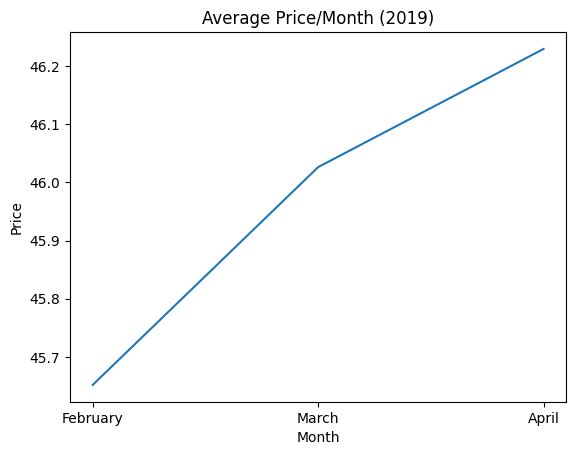

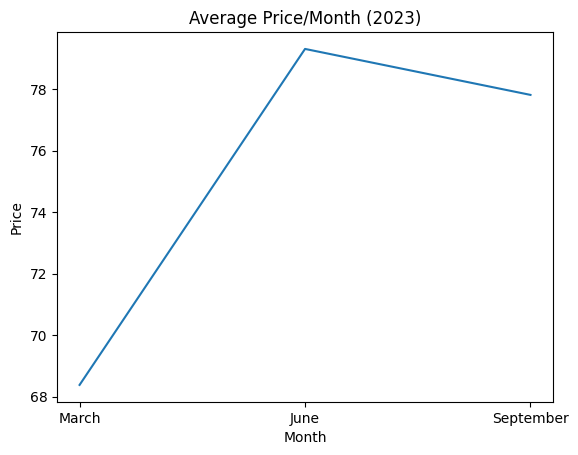

In [ ]:
#Q2
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

month_mean = train_19.groupby("month")["price"].mean()

month_mean.plot()

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Average Price/Month (2019)')
new_labels = ["February","March","April"]

plt.xticks(month_mean.index,new_labels)

plt.show()

month_mean = train_23.groupby("month")["price"].mean()

print('\n')

month_mean.plot()

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Average Price/Month (2023)')
new_labels = ["March","June","September"]

plt.xticks(month_mean.index,new_labels)

plt.show()


In [ ]:
#Q3

neigh_by_reviews = train_19.groupby(["neighbourhood","month"]).sum()["number_of_reviews"]
neigh_by_reviews = neigh_by_reviews.groupby(["neighbourhood"]).max().sort_values(ascending=False).head(5)
print("The top five neighbourhoods(2019) with the most reviews are\n",neigh_by_reviews.to_string())

neigh_by_reviews = train_23.groupby(["neighbourhood","month"]).sum()["number_of_reviews"]
neigh_by_reviews = neigh_by_reviews.groupby(["neighbourhood"]).max().sort_values(ascending=False).head(5)
print("\nThe top five neighbourhoods(2023) with the most reviews are\n",neigh_by_reviews.to_string())

The top five neighbourhoods(2019) with the most reviews are
 neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              35326
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 22748
ΝΕΟΣ ΚΟΣΜΟΣ                         15250
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ            13381
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    11609

The top five neighbourhoods(2023) with the most reviews are
 neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              120428
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  59376
ΝΕΟΣ ΚΟΣΜΟΣ                          40104
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     31641
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             31040


In [ ]:
#Q4

max_asset_neighb = train_19.groupby(["neighbourhood", "month"]).count().groupby(["neighbourhood"]).max()['id']
print("The neighbourhood with the most properties in 2019 is ", max_asset_neighb.idxmax(), " with ", max_asset_neighb.max())

max_asset_neighb = train_23.groupby(["neighbourhood", "month"]).count().groupby(["neighbourhood"]).max()['id']
print("\nThe neighbourhood with the most properties in 2023 is ", max_asset_neighb.idxmax(), " with ", max_asset_neighb.max())

The neighbourhood with the most properties in 2019 is  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  with  779

The neighbourhood with the most properties in 2023 is  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  with  1897


In [ ]:
#Q5
month = {2 : 'February', 3 : 'March', 4 : 'April', 6 : 'June', 9 : 'September'}
count_neigh_19 = train_19.groupby(["neighbourhood","month"]).count().groupby(["neighbourhood"]).max()['id']
count_month_19 = train_19.groupby(["month"]).count()['id']
print("Total number of properties in 2019")
print("\tper neighbourhood is:\n\n",count_neigh_19.to_string())
count_month_19 = count_month_19.rename(index = month)
print("\n\tper month is:\n\n",count_month_19.to_string())

count_neigh_23 = train_23.groupby(["neighbourhood","month"]).count().groupby(["neighbourhood"]).max()['id']
count_month_23 = train_23.groupby(["month"]).count()['id']
print("\nTotal number of properties in 2023")
print("\tper neighbourhood is:\n\n",count_neigh_23.to_string())
count_month_23 = count_month_23.rename(index = month)
print("\n\tper month is:\n\n",count_month_23.to_string())

Total number of properties in 2019
	per neighbourhood is:

 neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                       25
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                     12
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    283
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                       32
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                    42
ΑΚΡΟΠΟΛΗ                            220
ΑΜΠΕΛΟΚΗΠΟΙ                         185
ΑΝΩ ΚΥΨΕΛΗ                           34
ΑΝΩ ΠΑΤΗΣΙΑ                          24
ΒΟΤΑΝΙΚΟΣ                            44
ΓΚΑΖΙ                                41
ΓΚΥΖΗ                                50
ΓΟΥΒΑ                                25
ΓΟΥΔΙ                                58
ΕΛΛΗΝΟΡΩΣΩΝ                          20
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              779
ΖΑΠΠΕΙΟ                              76
ΘΗΣΕΙΟ                              193
ΙΛΙΣΙΑ                               98
ΚΕΡΑΜΕΙΚΟΣ                          154
ΚΟΛΟΚΥΝΘΟΥ                            8
ΚΟΛΩΝΑΚΙ                            192
ΚΟΛΩΝΟΣ                              59
ΚΟΥΚΑΚ

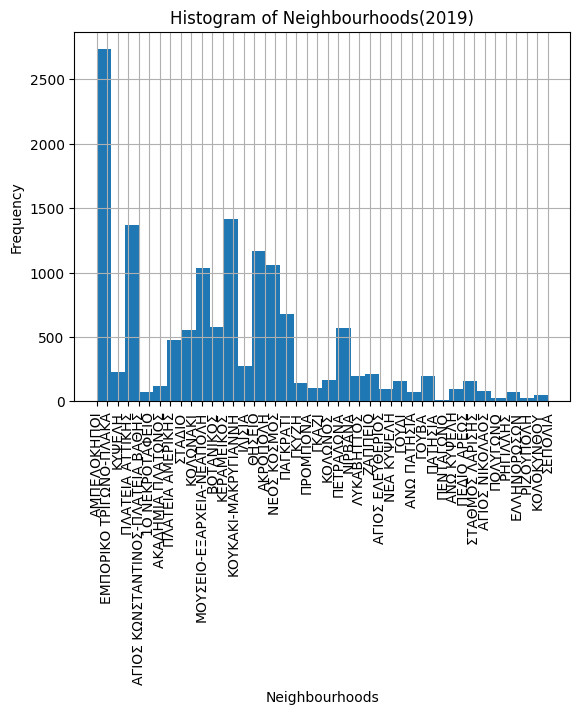

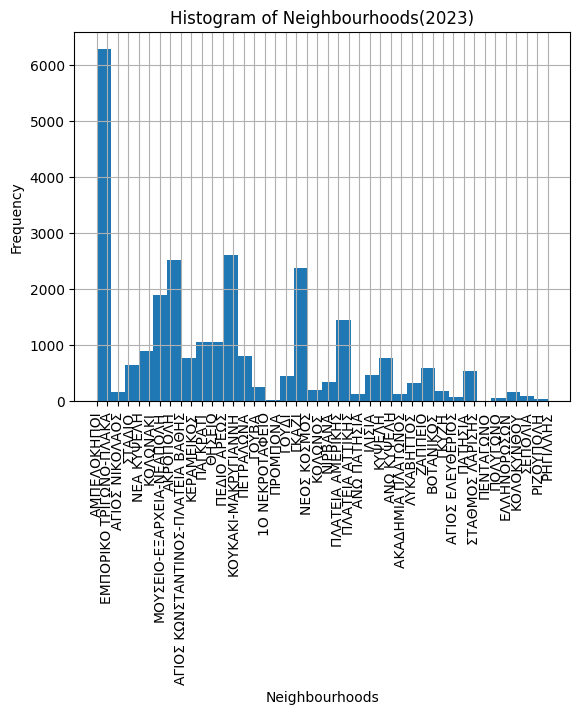

In [ ]:
#Q6
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

train_19["neighbourhood"].hist(bins = 32)
plt.xlabel("Neighbourhoods")
plt.ylabel('Frequency')
plt.title('Histogram of Neighbourhoods(2019)')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

print('\n')

train_23["neighbourhood"].hist(bins = 32)

plt.xlabel("Neighbourhoods")
plt.ylabel('Frequency')
plt.title('Histogram of Neighbourhoods(2023)')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [ ]:
#Q7
print("In 2019:\n")
df1 = train_19.groupby(["neighbourhood","month","room_type"]).count()[['id']]
df2 = df1.groupby(["neighbourhood","room_type"]).max()
df3 = df2.groupby("neighbourhood").idxmax()
for i in  df3["id"]:
    print("In the neighbourhood",i[0]," the most common room type is ",i[1])


print("\n\nIn 2023:\n")
df1 = train_23.groupby(["neighbourhood","month","room_type"]).count()[['id']]
df2 = df1.groupby(["neighbourhood","room_type"]).max()
df3 = df2.groupby("neighbourhood").idxmax()
for i in  df3["id"]:
    print("In the neighbourhood",i[0]," the most common room type is ",i[1])

In 2019:

In the neighbourhood 1Ο ΝΕΚΡΟΤΑΦΕΙΟ  the most common room type is  Entire home/apt
In the neighbourhood ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ  the most common room type is  Entire home/apt
In the neighbourhood ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  the most common room type is  Entire home/apt
In the neighbourhood ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ  the most common room type is  Entire home/apt
In the neighbourhood ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ  the most common room type is  Entire home/apt
In the neighbourhood ΑΚΡΟΠΟΛΗ  the most common room type is  Entire home/apt
In the neighbourhood ΑΜΠΕΛΟΚΗΠΟΙ  the most common room type is  Entire home/apt
In the neighbourhood ΑΝΩ ΚΥΨΕΛΗ  the most common room type is  Entire home/apt
In the neighbourhood ΑΝΩ ΠΑΤΗΣΙΑ  the most common room type is  Entire home/apt
In the neighbourhood ΒΟΤΑΝΙΚΟΣ  the most common room type is  Entire home/apt
In the neighbourhood ΓΚΑΖΙ  the most common room type is  Entire home/apt
In the neighbourhood ΓΚΥΖΗ  the most common room type is  Entire home/apt
In the nei

In [ ]:
#Q8
print("In 2019:")
train_19["price"] = train_19["price"].replace("$","")
train_19["price"] = train_19["price"].replace(",","").astype(float)

room_type_mean = train_19.groupby("room_type")["price"].mean().idxmax()
print(room_type_mean)

print("\nIn 2023:")
train_23["price"] = train_23["price"].replace("$","")
train_23["price"] = train_23["price"].replace(",","").astype(float)

room_type_mean = train_19.groupby("room_type")["price"].mean().idxmax()
print(room_type_mean)

In 2019:
Entire home/apt

In 2023:
Entire home/apt


In [ ]:
#Q9
import folium
from IPython.display import IFrame

data = pd.read_csv("/content/drive/MyDrive/data/2019/april/listings.csv",low_memory = False)

random_data = data.sample(n = 500)

geojson_file = "/content/drive/MyDrive/data/2019/april/neighbourhoods.geojson"

mymap = folium.Map(location=[random_data['latitude'].mean(),random_data['longitude'].mean()], zoom_start=12)

folium.GeoJson(geojson_file).add_to(mymap)

for index, row in random_data.iterrows():
    popup_text = f"Bed Type: {row['bed_type']}<br>Room Type: {row['room_type']}<br>Transit: {row['transit']}"
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(mymap)



display(mymap)

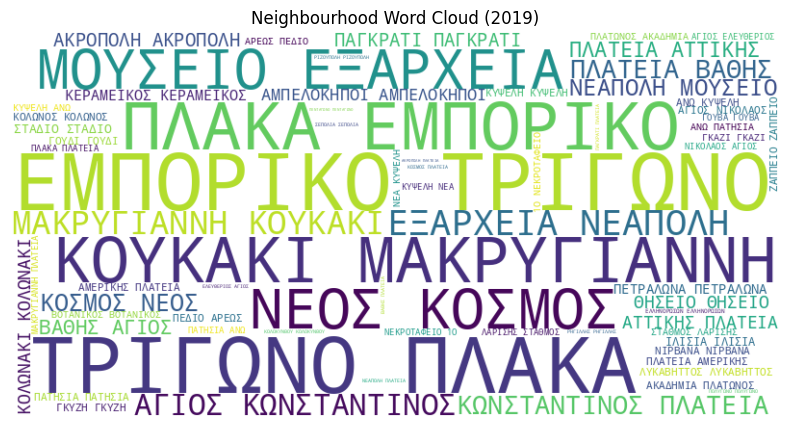

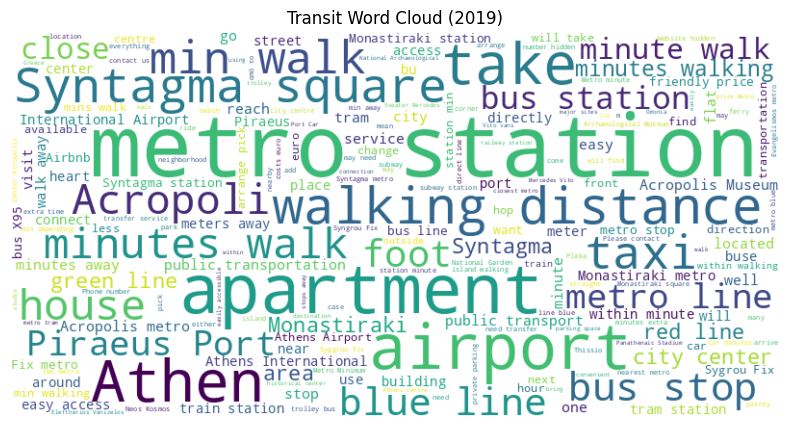

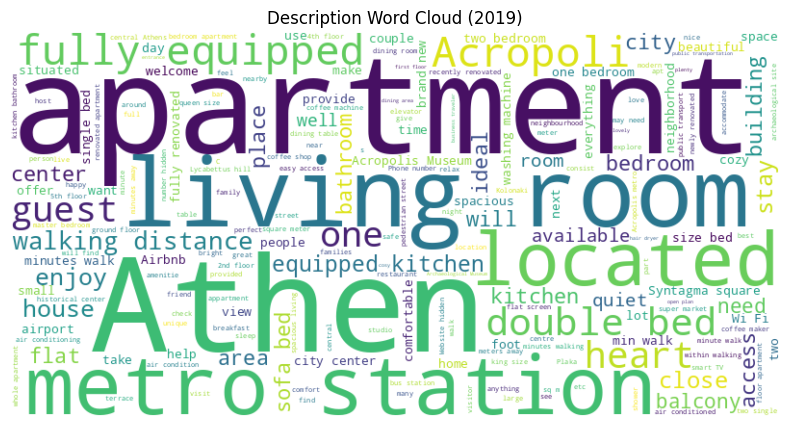

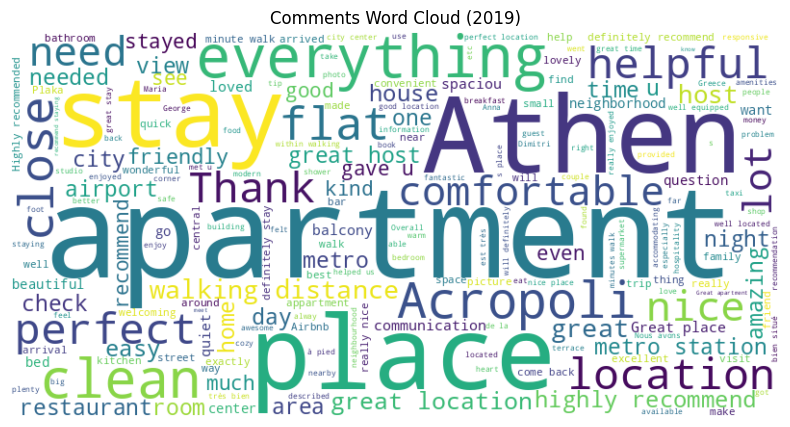

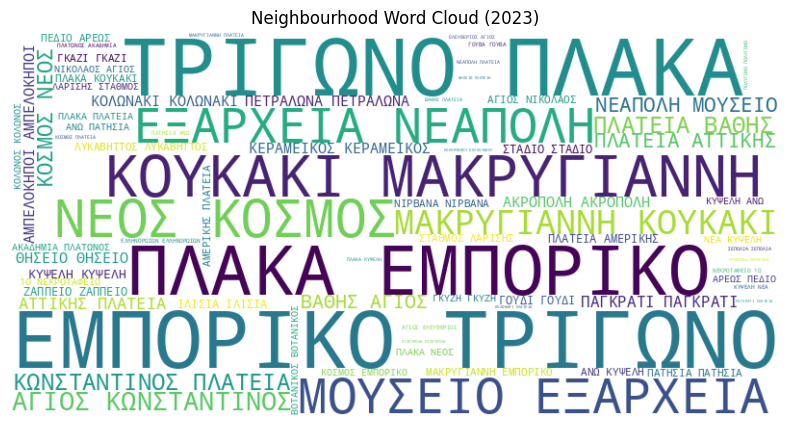

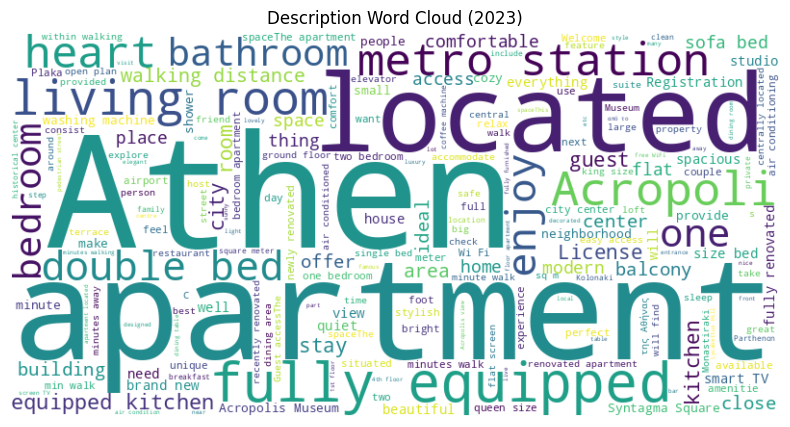

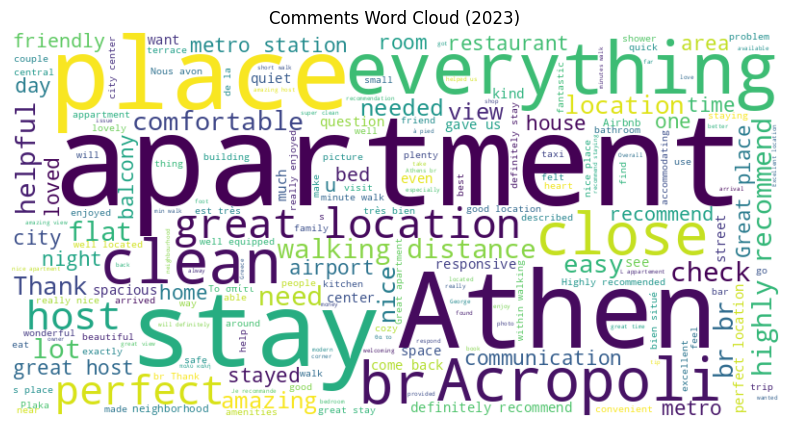

In [ ]:
#Q10
from wordcloud import WordCloud
import matplotlib.pyplot as plt

train_19['neighbourhood'] = train_19['neighbourhood'].astype(str)
train_19['transit'] = train_19['transit'].astype(str)
train_19['description'] = train_19['description'].astype(str)

neighbourhood_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_19['neighbourhood']))
plt.figure(figsize=(10, 5))
plt.imshow(neighbourhood_wordcloud, interpolation='bilinear')
plt.title('Neighbourhood Word Cloud (2019)')
plt.axis('off')
plt.show()

transit_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_19['transit']))
plt.figure(figsize=(10, 5))
plt.imshow(transit_wordcloud, interpolation='bilinear')
plt.title('Transit Word Cloud (2019)')
plt.axis('off')
plt.show()

description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_19['description']))
plt.figure(figsize=(10, 5))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Description Word Cloud (2019)')
plt.axis('off')
plt.show()

df_19_sample = reviews_19.sample(n = int(len(reviews_19)*0.3)).copy()
comments_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_19_sample['comments']))
plt.figure(figsize=(10, 5))
plt.imshow(comments_wordcloud, interpolation='bilinear')
plt.title('Comments Word Cloud (2019)')
plt.axis('off')
plt.show()

train_23['neighbourhood'] = train_23['neighbourhood'].astype(str)
#train_23 does not have transit column
#train_23['transit'] = train_23['transit'].astype(str)
train_23['description'] = train_23['description'].astype(str)

neighbourhood_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_23['neighbourhood']))
plt.figure(figsize=(10, 5))
plt.imshow(neighbourhood_wordcloud, interpolation='bilinear')
plt.title('Neighbourhood Word Cloud (2023)')
plt.axis('off')
plt.show()

# transit_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_23['transit']))
# plt.figure(figsize=(10, 5))
# plt.imshow(transit_wordcloud, interpolation='bilinear')
# plt.title('Transit Word Cloud (2023)')
# plt.axis('off')
# plt.show()

df_23_sample = train_23.sample(n = int(len(train_23)*0.3)).copy()

description_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_23_sample['description']))
plt.figure(figsize=(10, 5))
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.title('Description Word Cloud (2023)')
plt.axis('off')
plt.show()

df_23_sample = reviews_23.sample(n = int(len(reviews_23)*0.3)).copy()
comments_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_23_sample['comments']))
plt.figure(figsize=(10, 5))
plt.imshow(comments_wordcloud, interpolation='bilinear')
plt.title('Comments Word Cloud (2023)')
plt.axis('off')
plt.show()


In [ ]:
#Q11

Kitchen = ['kitchen','Kitchen','Dishes and silverware','Microwave','Double oven','Espresso machine','Cooking basics','Kitchenette','Convection oven','Hot water kettle','Changing table','Oven','Freezer','Refrigerator','Gas oven','Steam oven','Full kitchen','Formal dining area','Breakfast table','Breakfast','Coffee maker','BBQ grill','Stove']
accessibility = ['accessibility','Wheelchair accessible','Single level home','Accessible height toilet','Paid parking on premises','Free parking on premises','Outdoor parking','Ground floor access','Roll in shower','Walk in shower','Fixed grab bars for toilet','High chair','Wide doorway','Wide entryway','Stair gates','Bathtub with bath chair','Disabled parking spot','Fixed grab bars for shower','Flat path to front door','Wide clearance to shower','Wide clearance to bed','Elevator','Step free access','Accessible height bed','Wide hallway clearance','Shower chair']
Electricity_and_Technology = ['Electricity_and_Technology','Fax machine','Carbon monoxide detector','Dryer','Touchless faucets','Projector and screen','Washer Dryer','Sound system','TV','Keypad','Iron','Smart TV','Mini fridge','Air purifier','DVD player','High resolution computer monitor','Heated towel rack','Heat lamps','Hair dryer','Washer','Electric profiling bed','Heated floors','Ethernet connection','Printer','Amazon Echo','EV charger','Warming drawer','Dishwasher']
facilities = ['facilities','Private hot tub','Gym','Hot tub','Indoor fireplace','Stand alone steam shower','Pool','Garden or backyard','Hammock','Shared gym','Sauna','Day bed','Alfresco bathtub','Lake access','Balcony','Fire pit','Terrace','Jetted tub','Beach view','Patio or balcony','Private pool']
kids_friendly = ['kids_friendly','Outlet covers','Pets live on this property','Crib','Fireplace guards','Family kid friendly','Baby bath','Pack Γ n Play travel crib','Baby monitor','ChildrenΓ s books and toys','ChildrenΓ s dinnerware','Babysitter recommendations','Table corner guards']
security = ['security','Lock on bedroom door','Smart lock','Lockbox','Well lit path to entrance','Private bathroom','Window guards','Buzzer wireless intercom','Safety card','Private living room','Private entrance','Fire extinguisher','Doorman','Smoke detector']
services = ['services','Shampoo','Murphy bed','Laptop friendly workspace','Memory foam mattress','First aid kit','Sun loungers','Bed linens','Room darkening shades','Heating','24 hour check in','Bedroom comforts','Wine cooler','Air conditioning','Host greets you','Suitable for events','Mudroom','Ironing Board','Bidet','Bath towel','Bathtub','Ski in Ski out','toilet','Paid parking off premises','Smoking allowed','Ceiling fan','Bathroom essentials','Exercise equipment','Other pet s','En suite bathroom','Beachfront','Waterfront','Self check in','Essentials','Pets allowed','Mountain view','Building staff','Internet','Free street parking','Other','Handheld shower head','Wifi','Dog s','Cleaning before checkout','Pillow top mattress','HBO GO','Cat s','Outdoor seating','Long term stays allowed','Soaking tub','Standing valet','Rain shower','Cable TV','Hot water','Pocket wifi','Game console','Body soap','Luggage dropoff allowed','Extra pillows and blankets','Firm mattress','Hangers','Beach essentials','Toilet paper','Central air conditioning','Netflix']

replacement_values = {
    'kitchen': Kitchen,
    'accessibility': accessibility,
    'Electricity_and_Technology': Electricity_and_Technology,
    'facilities': facilities,
    'kids_friendly': kids_friendly,
    'security': security,
    'services': services
}

def categorize_amenities(row):
    categories_found = []
    for category, values in replacement_values.items():
        for value in values:
            if value in row['amenities']:
                categories_found.append(category)
                break
    return categories_found

train_19['amenities'] = train_19.apply(categorize_amenities, axis=1)

train_23['amenities'] = train_23.apply(categorize_amenities, axis=1)

train_19.to_csv("/content/drive/MyDrive/data/train_2019.csv")
train_23.to_csv("/content/drive/MyDrive/data/train_2023.csv")

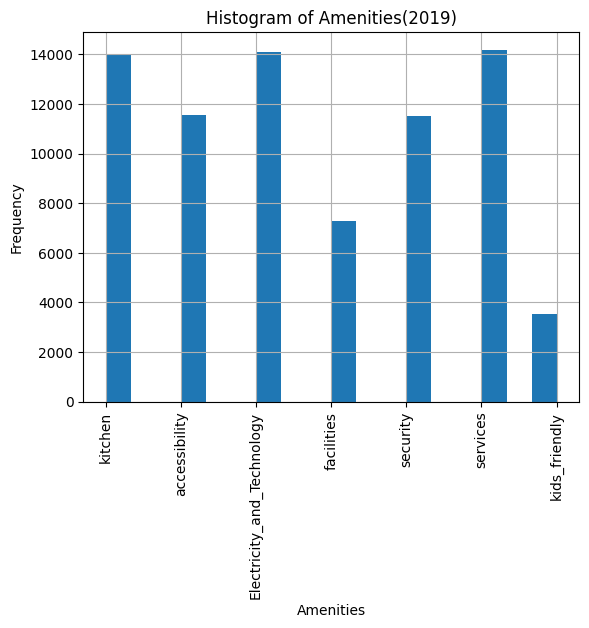

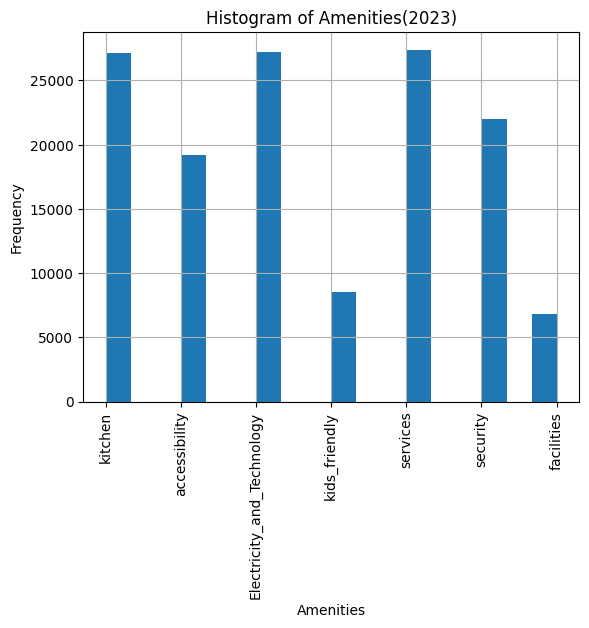

In [ ]:
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


temp_dict = {'amenities' : []}
for amenity_list in train_19['amenities']:
  for amenity in amenity_list:
    temp_dict['amenities'].append(amenity)
total_amenities = pd.DataFrame(temp_dict)

total_amenities["amenities"].hist(bins = 18)
plt.xlabel("Amenities")
plt.ylabel('Frequency')
plt.title('Histogram of Amenities(2019)')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

print("\n")

temp_dict = {'amenities' : []}
for amenity_list in train_23['amenities']:
  for amenity in amenity_list:
    temp_dict['amenities'].append(amenity)
total_amenities = pd.DataFrame(temp_dict)

total_amenities["amenities"].hist(bins = 18)
plt.xlabel("Amenities")
plt.ylabel('Frequency')
plt.title('Histogram of Amenities(2023)')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

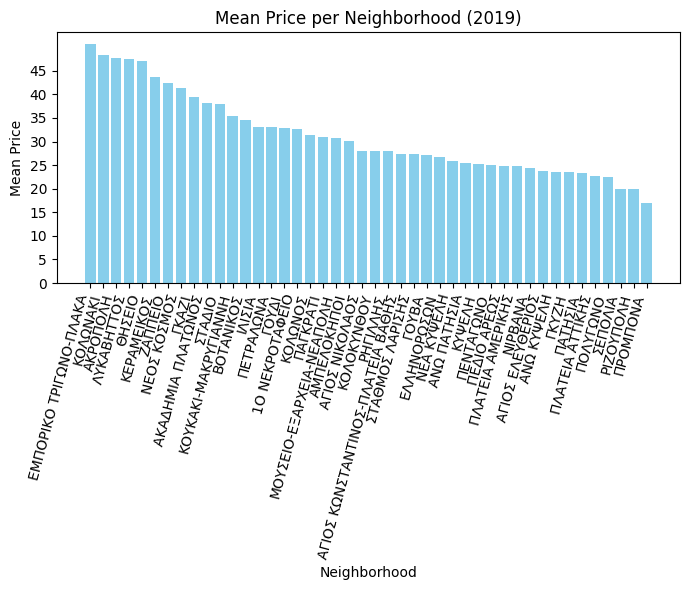

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              Expensive
ΚΟΛΩΝΑΚΙ                            Expensive
ΑΚΡΟΠΟΛΗ                            Expensive
ΛΥΚΑΒΗΤΤΟΣ                          Expensive
ΘΗΣΕΙΟ                              Expensive
ΚΕΡΑΜΕΙΚΟΣ                            Average
ΖΑΠΠΕΙΟ                               Average
ΝΕΟΣ ΚΟΣΜΟΣ                           Average
ΓΚΑΖΙ                                 Average
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                     Average
ΣΤΑΔΙΟ                                Average
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                   Average
ΒΟΤΑΝΙΚΟΣ                             Average
ΙΛΙΣΙΑ                                Average
ΠΕΤΡΑΛΩΝΑ                             Average
ΓΟΥΔΙ                                 Average
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                        Average
ΚΟΛΩΝΟΣ                               Average
ΠΑΓΚΡΑΤΙ                              Average
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ              Average
ΑΜΠΕΛΟΚΗΠΟΙ                           Average
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ      

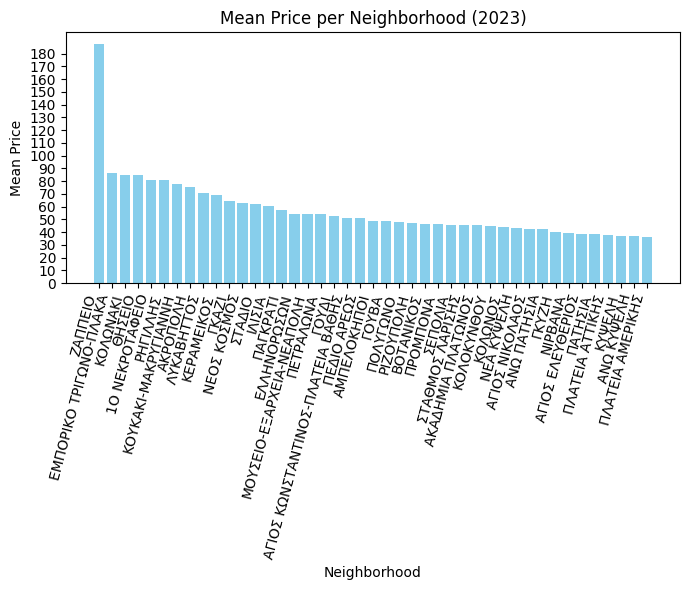

neighbourhood
ΖΑΠΠΕΙΟ                             Expensive
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              Expensive
ΚΟΛΩΝΑΚΙ                            Expensive
ΘΗΣΕΙΟ                              Expensive
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      Expensive
ΡΗΓΙΛΛΗΣ                              Average
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                   Average
ΑΚΡΟΠΟΛΗ                              Average
ΛΥΚΑΒΗΤΤΟΣ                            Average
ΚΕΡΑΜΕΙΚΟΣ                            Average
ΓΚΑΖΙ                                 Average
ΝΕΟΣ ΚΟΣΜΟΣ                           Average
ΣΤΑΔΙΟ                                Average
ΙΛΙΣΙΑ                                Average
ΠΑΓΚΡΑΤΙ                              Average
ΕΛΛΗΝΟΡΩΣΩΝ                           Average
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ              Average
ΠΕΤΡΑΛΩΝΑ                             Average
ΓΟΥΔΙ                                 Average
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ      Average
ΠΕΔΙΟ ΑΡΕΩΣ                           Average
ΑΜΠΕΛΟΚΗΠΟΙ         

In [ ]:
#Q12
import matplotlib.pyplot as plt
import math
import statistics

def categorize_neighborhood(price): #αν δεν εχει οικονομικη κατηγορια επειτα απο cleaning βαλε quantile(0.75/0.25)
    if price > expensive_threshold:
        return 'Expensive'
    elif price > economic_threshold:
        return 'Average'
    else:
        return 'Economic'

train_19["price"] = train_19["price"].replace("$","")
train_19["price"] = train_19["price"].replace(",","").astype(float)

filter = train_19[train_19['accommodates'] == 2]

filter = filter.groupby("neighbourhood")["price"].mean().sort_values(ascending = False)

plt.figure(figsize=(7, 6))
plt.bar(filter.index,filter,color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.title('Mean Price per Neighborhood (2019)')
plt.yticks(range(0,math.ceil(int(filter.max())),5))
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

expensive_threshold = filter.quantile(0.90)
economic_threshold = filter.quantile(0.10)

filter['category'] = filter.apply(categorize_neighborhood)

print(filter["category"].to_string())

filter_19 = filter.copy()

train_23["price"] = train_23["price"].replace("$","")
train_23["price"] = train_23["price"].replace(",","").astype(float)

filter = train_23[train_23['accommodates'] == 2]

filter = filter.groupby("neighbourhood")["price"].mean().sort_values(ascending = False)

plt.figure(figsize=(7, 6))
plt.bar(filter.index,filter,color='skyblue')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.title('Mean Price per Neighborhood (2023)')
plt.yticks(range(0,math.ceil(int(filter.max())),10))
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

expensive_threshold = filter.quantile(0.90)
economic_threshold = filter.quantile(0.10)


filter['category'] = filter.apply(categorize_neighborhood)

print(filter["category"].to_string())

#Q13.a
Ποιες είναι οι γειτονιές με το μεγαλύτερο ποσοστό ασφαλών σπιτιών το 2019;
(Χρησιμοποιώντας την στήλη amenities με την κατηγορία security)

In [ ]:
#Q13.a

neighbourhoods = train_19.groupby(["id"]).last()[["amenities","neighbourhood"]]

neighbourhoods = neighbourhoods[neighbourhoods["neighbourhood"].apply(lambda x: 'nan' not in x)] #may delete after clean

total = neighbourhoods.groupby("neighbourhood").count().sort_values(by = "amenities",ascending = False)

total = total.rename(columns={'amenities': 'Total'})

neighbourhoods = neighbourhoods[neighbourhoods['amenities'].apply(lambda x: 'security' in x)]

neighbourhoods = neighbourhoods.groupby("neighbourhood").count().sort_values(by = "amenities",ascending = False)

neighbourhoods = neighbourhoods.rename(columns={'amenities': '% With Security'})

total = total.reindex(neighbourhoods.index)

result = neighbourhoods.div(total['Total'], axis=0).sort_values(by = "% With Security",ascending = False)

result *= 100

print(result)

                                  % With Security
neighbourhood                                    
ΠΕΝΤΑΓΩΝΟ                              100.000000
ΝΕΑ ΚΥΨΕΛΗ                              95.652174
ΕΛΛΗΝΟΡΩΣΩΝ                             95.000000
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                       93.023256
ΚΕΡΑΜΕΙΚΟΣ                              91.411043
ΚΟΛΩΝΟΣ                                 90.322581
ΝΙΡΒΑΝΑ                                 89.090909
ΚΟΛΟΚΥΝΘΟΥ                              88.888889
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                          87.878788
ΡΗΓΙΛΛΗΣ                                87.500000
ΘΗΣΕΙΟ                                  87.128713
ΑΚΡΟΠΟΛΗ                                85.903084
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                  85.243902
ΣΕΠΟΛΙΑ                                 84.615385
ΠΕΤΡΑΛΩΝΑ                               84.375000
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                     83.522727
ΓΚΑΖΙ                                   83.333333
ΝΕΟΣ ΚΟΣΜΟΣ                             82.278481


#Q13.b
Το 2019 ποιες είναι οι πρώτες 5 γειτονιές φιλικές προς τις οικογένειες με παιδιά;
 (Χρησιμοποιώντας την στήλη amenities με την κατηγορία kid_friendly)


In [ ]:
neighbourhoods = train_19.groupby(["id"]).last()[["amenities","neighbourhood"]]

neighbourhoods = neighbourhoods[neighbourhoods["neighbourhood"].apply(lambda x: 'nan' not in x)] #may delete after clean

total = neighbourhoods.groupby("neighbourhood").count().sort_values(by = "amenities",ascending = False)

total = total.rename(columns={'amenities': 'Total'})

neighbourhoods = neighbourhoods[neighbourhoods['amenities'].apply(lambda x: 'kids_friendly' in x)]

neighbourhoods = neighbourhoods.groupby("neighbourhood").count().sort_values(by = "amenities",ascending = False)

neighbourhoods = neighbourhoods.rename(columns={'amenities': 'Family Friendly'})

total = total.reindex(neighbourhoods.index)

result = neighbourhoods.div(total['Total'], axis=0).sort_values(by = "Family Friendly",ascending = False)

print("The 5 most family friendly neighbourhoods are:\n")
for i in result.index[0:5].to_list():
  print(i)


The 5 most family friendly neighbourhoods are:

ΡΗΓΙΛΛΗΣ
ΑΚΡΟΠΟΛΗ
ΖΑΠΠΕΙΟ
1Ο ΝΕΚΡΟΤΑΦΕΙΟ
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ


#Q13.c
Τι ποσοστό των καταλυμάτων της Αθήνας έχει αυστηρή/μέτρια/επιεική πολιτική ακύρωσης μιας κράτησης το 2019;

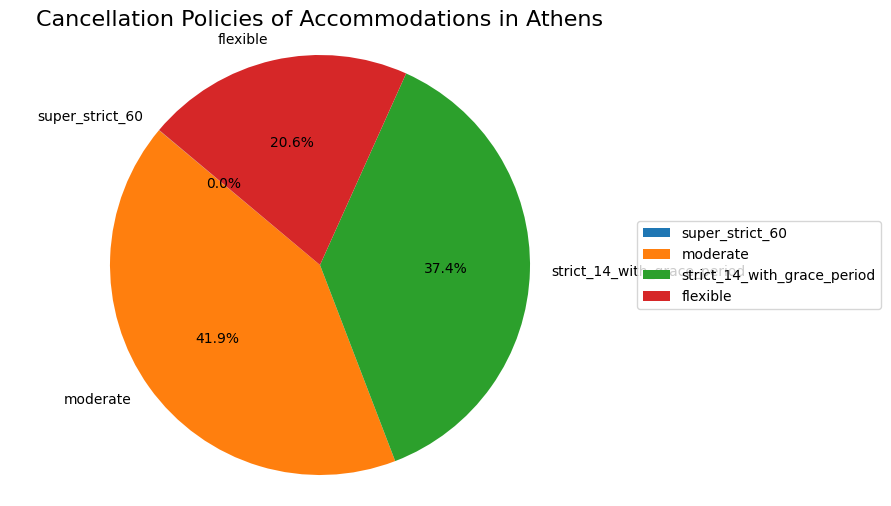

In [ ]:
#Q13.c
import numpy as np

policy_counts = train_19.groupby("id").last()['cancellation_policy'].value_counts(normalize=True) * 100

np.random.seed(98732)  # Set a seed for reproducibility
policy_counts = policy_counts.sample(frac=1)

plt.figure(figsize=(8, 6))
plt.pie(policy_counts, labels=policy_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cancellation Policies of Accommodations in Athens', fontsize=16)
plt.axis('equal')

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.rcParams.update({'font.size': 12})
plt.show()

In [ ]:
#Q14


host_listings = list_0_19.groupby('host_id')['id'].count().reset_index()

host_listings_sorted = host_listings.sort_values(by='id', ascending=False)

top_10_hosts = host_listings_sorted.head(10)

result = top_10_hosts.rename(columns={'id': 'num_host_listings'})

result.index = range(1,11)
print("In 2019:\n")
print(result)

host_listings = list_023.groupby('host_id')['id'].count().reset_index()

host_listings_sorted = host_listings.sort_values(by='id', ascending=False)

top_10_hosts = host_listings_sorted.head(10)

result = top_10_hosts.rename(columns={'id': 'num_host_listings'})

result.index = range(1,11)
print("\nIn 2023:\n")
print(result)

In 2019:

      host_id  num_host_listings
1    77457889                272
2    29927830                259
3      748818                226
4   135482892                224
5     1621474                195
6     1418201                188
7   112527018                169
8    65714690                133
9     2089542                130
10   55670751                126

In 2023:

      host_id  num_host_listings
1    20104194                329
2    90390850                223
3   113548208                213
4      748818                212
5    29927830                203
6     2089542                169
7    47267002                160
8   182156346                159
9   112527018                151
10  114156592                151


#Q15

###Από τα γραφήματα μας αρχικά παρατηρούμε πως ανάμεσα στις 2 χρονιές,το πλήθος από ακίνητα αυξήθηκε από το 2019 στο 2023.
###Το 2019 το μεγαλύτερο πλήθος ακινήτων γειτονιάς δεν ξεπερναγε τα 3000 ενώ το 2023 παρατηρούμε πώς οι περισσότερες γειτονιές έχουν πάνω απο 2500 ακίνητα με το μέγιστο να ξεπερνά μεχρι και τα 6000.
###Επίσης παρατηρούμε πώς οι γειτονιές δεν άλλαξαν ιδιαίτερα ανάμεσα στο 2019 και 2023.
###Παρέμειναν όλες οι γειτονιές με μόνη πρόσθεση του 2023 το Πεντάγωνο.
###Έπειτα βλέπουμε μια συντριπτική αύξηση στη μέση τιμή ενός ακινήτου ανά γειτονιά.
###Πιθανώς μέρος αύτης της αύξησης να οφείλεται σε σύγκριση διαφορετικών περιόδων.
###Τα δεδομένα μας για το 2023 περιέχουν και τον Ιούνιο,μήνας τουριστικής περιόδου όπου οι ιδιοκτήτες ανέβαζουν τις τιμές λόγω ζήτησης,ενώ το 2019 αναλύουμε τα δεδομένα του τριμήνου Φεβρουάριος-Μάρτιος-Απρίλιος οπού δεν παρατηρείται φαινόμενο τουρισμού σε υπερβολικό βαθμό.
###Ωστόσο η αυξήση είναι υπερβολική για να θεωρηθεί συνάρτηση αυτού του φαινομένου και μόνο.
###Το 2019 είχαμε τιμές να κυμαίνονται από 20.00\$ μέχρι 50.00\$ με πιο ακριβή περιοχή την Πλάκα,συγκριτικά φθηνότερα σε σχέση με το 2023 όπου υπήρχε γενική αύξηση στις τιμές με τη χαμηλότερη περιοχή να πλησιάζει την ακριβότερη του 2019 περίπου στα 40.00\$ και με την ακριβότερη να ξεπερνά τα 180.00$ η οποία είναι το Ζάπειο,μια μέτρια περιοχή στην οικονομική κλίμακα του 2019.


In [ ]:
#Q2
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

rec_sys_train = pd.concat([train_19,train_23],ignore_index=True)

rec_sys_train = rec_sys_train[["id","name","description"]]

rec_sys_train = rec_sys_train.groupby("id").last()[["name","description"]]

rec_sys_train["description"] = rec_sys_train["description"].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', x))
rec_sys_train["description"] = rec_sys_train["description"].str.replace('-', '')
rec_sys_train["description"] = rec_sys_train["description"].str.replace('_', '')
rec_sys_train["description"] = rec_sys_train["description"].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
rec_sys_train["description"] = rec_sys_train["description"].apply(lambda x: re.sub(r'\d+', ' ', x))
rec_sys_train["description"] = rec_sys_train["description"].apply(lambda x: re.sub(r'\s+', ' ', x))

rec_sys_train["name"] = rec_sys_train["name"].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', x))
rec_sys_train["name"] = rec_sys_train["name"].str.replace('-', '')
rec_sys_train["name"] = rec_sys_train["name"].str.replace('_', '')
rec_sys_train["name"] = rec_sys_train["name"].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
rec_sys_train["name"] = rec_sys_train["name"].apply(lambda x: re.sub(r'\d+', ' ', x))
rec_sys_train["name"] = rec_sys_train["name"].apply(lambda x: re.sub(r'\s+', ' ', x))

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    tokens = nltk.word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)  # Join the tokens back into a string

# Remove stopwords from 'text_column'
rec_sys_train['description'] = rec_sys_train['description'].apply(remove_stopwords)
rec_sys_train['name'] = rec_sys_train['name'].apply(remove_stopwords)

rec_sys_train["concatenation"] = rec_sys_train["name"] + " " + rec_sys_train["description"]

rec_sys_train = rec_sys_train.dropna()

#take a sample of the dataframe to calculate collocations (10% of the actual rows)
#with a 10% sample calculating TF-IDF takes about 1 sec and cosine similarity about 15 sec
rec_sys_train = rec_sys_train.sample(n = (int)(len(rec_sys_train)*0.1))



# print(rec_sys_train.to_string())

In [ ]:
#Q2.1
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, ngram_range=(1, 2))

tfidf = tfidf_vectorizer.fit_transform(rec_sys_train["concatenation"])

tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
#Q2.2
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cos_sim_matrix = cosine_similarity(tfidf_df, tfidf_df)

np.fill_diagonal(cos_sim_matrix, -1)

similar_properties = {} #dictionary

for i, property_name in enumerate(rec_sys_train.index):
  top_similar_indices = sorted(range(len(cos_sim_matrix[i])), key=lambda x: cos_sim_matrix[i][x], reverse=True)[:100]
  similar_properties[property_name] = [rec_sys_train.index[idx] for idx in top_similar_indices]

for property_name, similar_list in similar_properties.items():
    print(f"{property_name}: {similar_list}")

17216563: [44449129, 44088449, 21365933, 50015676, 33739080, 708588191650480073, 1302981, 25099801, 24071841, 884746789196231534, 32704831, 757677447835478277, 13977595, 39769523, 973034672117114442, 41900789, 28416478, 776657169303578749, 948448830448250659, 848456164382083007, 30033958, 38110538, 820883708502477471, 13339455, 840985685801831638, 32042225, 53619706, 27563227, 33131348, 33646553, 884551928600178845, 2693342, 39593558, 875244444872190565, 50109851, 689577416175096035, 822216840569072226, 23417733, 45765268, 822203501771844157, 830298510150422935, 6233675, 18405109, 26470416, 54188017, 18770769, 25760203, 39657532, 42035685, 40613426, 45761089, 38508150, 889171749983133865, 811926303826101035, 17315392, 26329930, 21794188, 898586381838193043, 792748962051024368, 25023777, 34486168, 19976924, 582614149243365013, 21777381, 913846985591886468, 26628506, 27736231, 18788914, 23106587, 20007873, 664987127588632727, 51096239, 635348264928638920, 660498149068448547, 46254308, 60

In [ ]:
#Q2.3
def recommend(item_id,N):
  if N > 100:
    print("Only The First 100 Similar Properties Available\n")
  N = 100
  N_rec = similar_properties[item_id][:N]
  print("Recommending",N,"listings similar to Studio\n")
  print("---------------------------------------------------------\n")
  for id in N_rec:
    name = rec_sys_train[rec_sys_train.index == id]["name"].to_list()
    print("Recommended:", name[0])
    description =  rec_sys_train[rec_sys_train.index == id]["description"].to_list()
    print("Description:",description[0])
    row = rec_sys_train.index.get_loc(item_id)
    col = rec_sys_train.index.get_loc(id)
    score = cos_sim_matrix[row][col]
    print("(score:",score,")\n")

recommend(13762089,5)

Recommending 100 listings similar to Studio

---------------------------------------------------------

Recommended: Rental unit Athina bedroom beds bath
Description: Cozy apartment min walking form Neos Kosmos metro station ideal starting point people want close access historical sites local nightlife since within walking distance main attractions Athens Fully equipped everything need enjoy stay Athens carefree Ideal couples families business travelers solo adventurers Registration number
(score: 0.1057718901272637 )

Recommended: Condo Athina bedroom beds bath
Description: quiet fully renovated apartment one historical popular neighborhoods Pagrati heart Athens full coffee shops restaurants Located Evaggelismos metro station easy transport Airport Port min walking Kallimarmaro National Zappeion gardens min Syntagma sq Close Acropolis archaeological sites museums well scenic Plaka neighborhood Suitable Business Travelers Singles Couples Families spaceThis sq apartment located fourth f

In [ ]:
#Q2.4
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


tokenized_text = [nltk.word_tokenize(text) for text in rec_sys_train['concatenation'].to_list()]

finder = BigramCollocationFinder.from_documents(tokenized_text)

top_10_collocations = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)

for collocation in top_10_collocations:
    print(' '.join(collocation))


Rental unit
unit Athina
living room
Registration number
Athina bedroom
fully equipped
beds bath
walking distance
bedrooms beds
metro station


In [ ]:
import nltk
nltk.download('wordnet')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/ai-2-deep-learning-for-nlp-homework-1/train_dataset.csv'